In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [124]:
data = pd.read_csv("Customer Churn.csv")
data.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [126]:
data["TotalCharges"] = data["TotalCharges"].replace(" ","0")
data["TotalCharges"] = data["TotalCharges"].astype("float")

In [127]:
data.isnull().sum().sum()

0

In [128]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [129]:
data["customerID"].duplicated().sum()

0

In [130]:
df = pd.DataFrame(data)

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [131]:
def conv(value):
    if value == 1:
        return "yes"
    elif value == 0:
        return "No"
    else:
        return value 

data["SeniorCitizen"] = data["SeniorCitizen"].apply(conv)

In [132]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


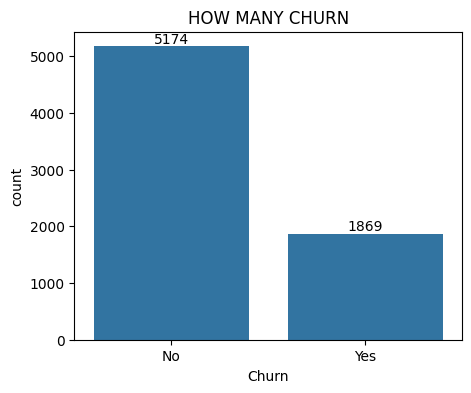

In [133]:
plt.figure(figsize=(5,4))
c = sns.countplot(data=data , x= "Churn")
for i in c.containers:
    c.bar_label(i)
plt.title("HOW MANY CHURN")
plt.show()

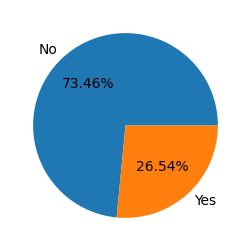

In [134]:
plt.figure(figsize=(4,3))
gr = data.groupby("Churn").agg({"Churn":"count"})
plt.pie(gr["Churn"],labels=gr.index ,autopct= "%1.2f%%" )
plt.show()

#from the given charts we can conclude that 26.54 percentange of customers have churned out

In [135]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


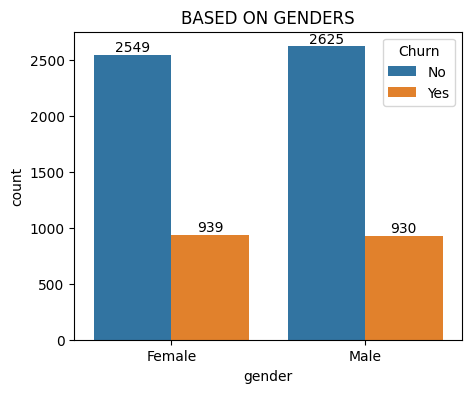

In [136]:
plt.figure(figsize=(5,4))
h =sns.countplot(data=data , x="gender" , hue = "Churn")
for i in h.containers:
    h.bar_label(i)
plt.title("BASED ON GENDERS")
plt.show()

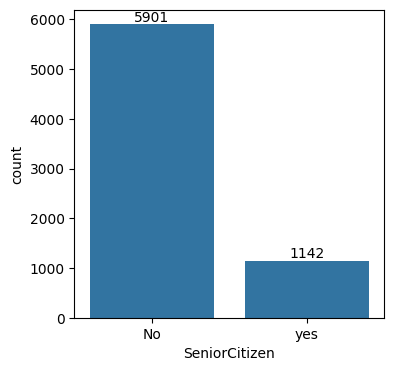

In [137]:
plt.figure(figsize=(4,4))
l = sns.countplot(data=data , x="SeniorCitizen" )
for i in l.containers:
    l.bar_label(i)
plt.show()

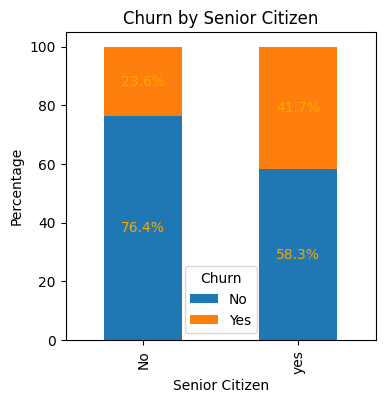

In [138]:
counts = data.groupby(['SeniorCitizen', 'Churn']).size().unstack()
percentages = counts.divide(counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(4, 4))

percentages.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

for container in ax.containers:
    heights = container.datavalues
    cumulative_heights = heights.cumsum()
    
    ax.bar_label(container, labels=[f'{h:.1f}%' for h in heights], color='orange', label_type='center')

plt.title('Churn by Senior Citizen')
plt.ylabel('Percentage')
plt.xlabel('Senior Citizen')
plt.legend(title='Churn')
plt.show()

#comparative a greater pecentage of people in senior citizwn have churned

In [147]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

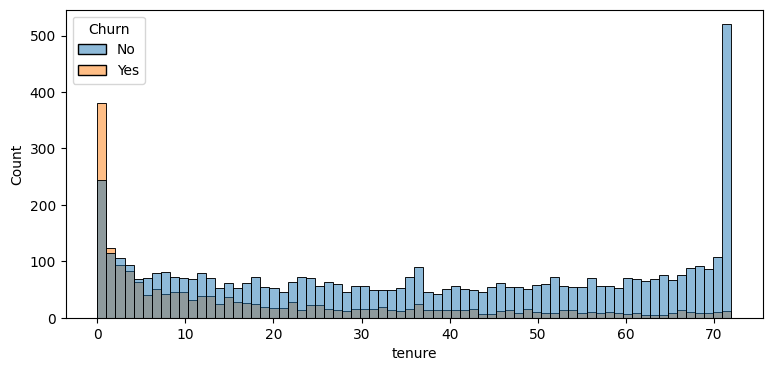

In [140]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure" ,data = data , bins =70 ,hue = "Churn")
plt.show()

#people who have used our services for long time have stayed and people who have used
#1 or 3 months have churned

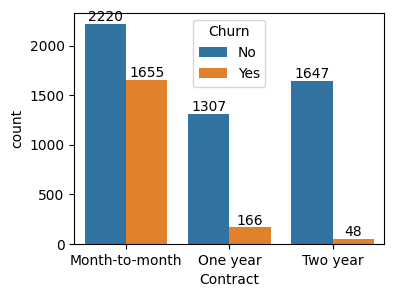

In [142]:
plt.figure(figsize=(4,3))
y = sns.countplot(data=data,x="Contract" , hue = "Churn")
for i in y.containers:
    y.bar_label(i)
plt.show()

#people who have contract of month to month they churned most but then from those who have 1 orr 2 years of contarct 

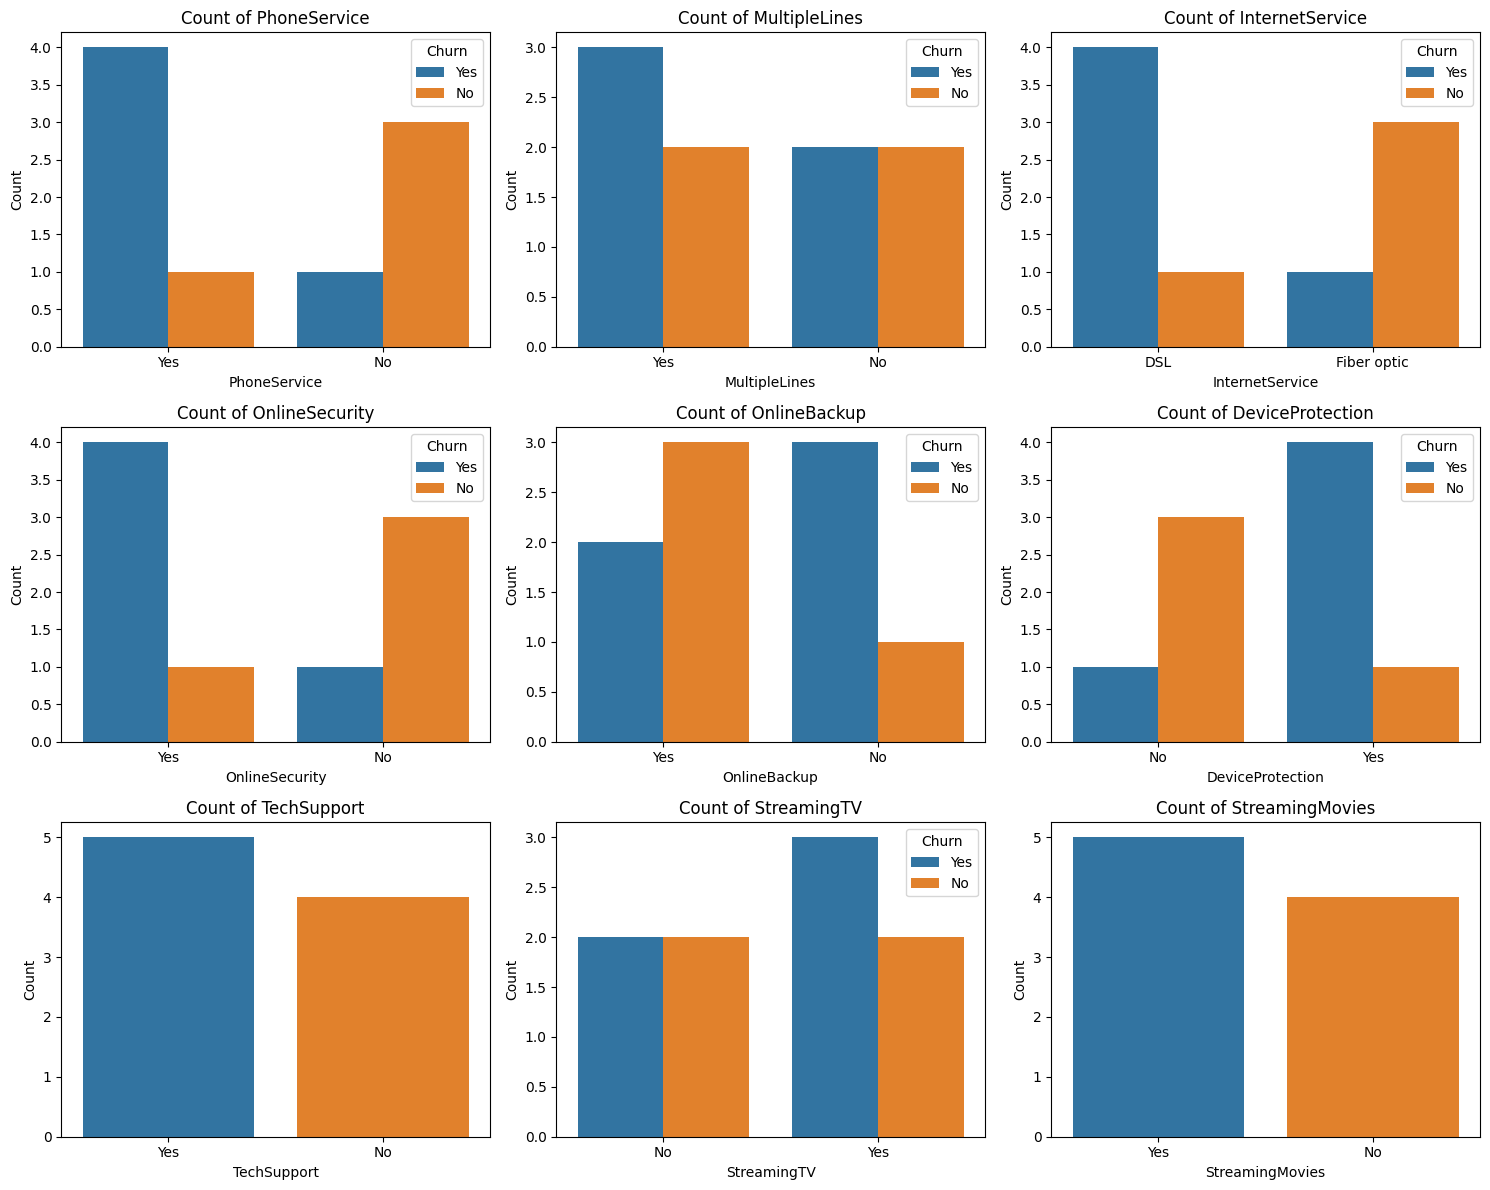

In [156]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

n = len(columns)
ncols = 3  # Number of columns in the subplot grid
nrows = (n + ncols - 1) // ncols  # Calculate number of rows needed
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, column in enumerate(columns):
    sns.countplot(data=data, x=column, ax=axes[i], hue='Churn')
    axes[i].set_title(f'Count of {column}')
    axes[i].set_ylabel('Count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#PhoneService: Most customers with phone service did not churn, while churn is higher among those without phone service.

#InternetService: Customers with fiber-optic internet have a higher churn rate compared to those with DSL, where churn is lower.

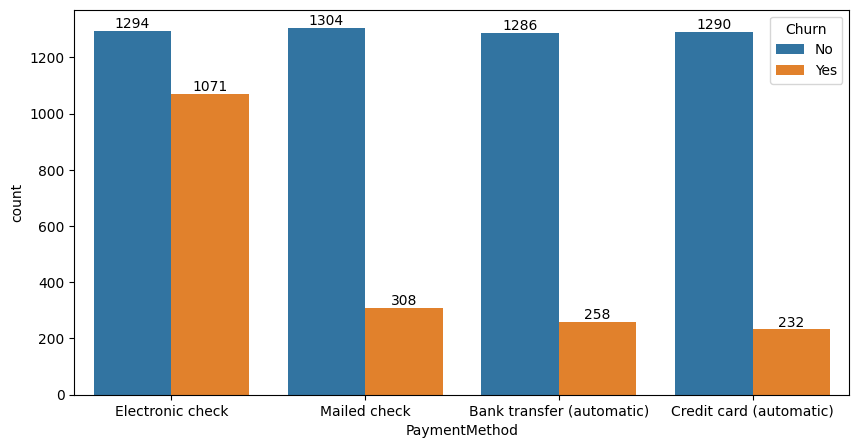

In [167]:
plt.figure(figsize=(10,5))
o = sns.countplot(data=df , x="PaymentMethod" , hue = "Churn")
for i in o.containers:
    o.bar_label(i)
plt.show()

#Customers using automatic payments (bank transfer, credit card) have a much lower churn rate compared to electronic check users. Electronic check has the highest churn rate, with almost equal numbers of customers staying and leaving.